In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imported Libraries

In [2]:
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split as split
from matplotlib import pyplot as plt

In [3]:
df_x=pd.read_csv('C:\\Users\\adwai\\Downloads\\train_X.csv')
df_y=pd.read_csv('C:\\Users\\adwai\\Downloads\\train_y.csv')

# Checking if data is read successfully or not

In [4]:
df_x.head()

,Unnamed: 0,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_y.head()

,Unnamed: 0,label
0,0,5
1,1,0
2,2,4
3,3,1
4,4,9


# Checking the Shape of Data

In [6]:
row,column = df_x.shape

In [7]:
row,column

(60000, 785)

In [8]:
df_y.shape

(60000, 2)

In [9]:
testx=pd.read_csv('C:\\Users\\adwai\\Downloads\\test_X.csv\\test_X.csv',index_col=0).to_numpy()
testx = testx.T

In [10]:
df_x=df_x.iloc[:,1:]
df_y=df_y.label

In [11]:
# test_x=testx.iloc[:,1:]

# Splitting the data for training and testing

In [12]:
train_x,test_x,train_y,test_y=split(df_x,df_y,test_size=0.15,random_state=69,shuffle=True)

In [13]:
def pixels():
    return 255

train_x=np.array(train_x).T
train_x=train_x/pixels()

test_x=np.array(test_x).T
test_x=test_x/pixels()

train_y=np.array(train_y).reshape(-1,)
test_y=np.array(test_y).reshape(-1,)


testx=np.array(testx)

In [14]:
train_x.shape

(784, 51000)

In [15]:
train_y.shape

(51000,)

In [16]:
test_x.shape

(784, 9000)

In [17]:
test_y.shape

(9000,)

# Activtion Function

# 1. RELU (Hidden Layer)

In [18]:
# Relu function defintion
def Relu(Z):
    return np.maximum(Z, 0)


#Derivative of relu function
def Relu_derivative(Z):
    return Z > 0

# 2. Softmax (Output Layer)

In [19]:
# Softmax function definition
def softmax(Z):
    V = np.exp(Z) / sum(np.exp(Z))
    return V

In [20]:
def adder(a, b) :
    return a + b
def multiplier(a, b) :
    return a * b
def inverse(a) :
    return 1/a
def subtractor(a,b):
    return a-b


def param_init_values():
    W1 = np.random.rand(10, 784) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
    
def fwd_prop(W1, b1, W2, b2, X):
    Z1 = adder(W1.dot(X) , b1)
    A1 = Relu(Z1)
    Z2 = adder(W2.dot(A1) , b2)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#We have to one hot encode Y (which is Total examples)
def one_hot_encod(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def bwd_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encod(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = multiplier(inverse(row) , dZ2.dot(A1.T)) 
    db2 = multiplier(inverse(row) , np.sum(dZ2))
    dZ1 = multiplier(W2.T.dot(dZ2), Relu_derivative(Z1))
    dW1 = multiplier(inverse(row) , dZ1.dot(X.T))
    db1 = multiplier(inverse(row) , np.sum(dZ1))
    return dW1, db1, dW2, db2

def updated_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = subtractor(W1 , multiplier(alpha, dW1))
    b1 = subtractor(b1 , multiplier(alpha, db1))    
    W2 = subtractor(W2 , multiplier(alpha, dW2))  
    b2 = subtractor(b2 , multiplier(alpha, db2))    
    return W1, b1, W2, b2

In [21]:
def printer(i):
    print("Iteration: ", i)
    return

def prediction(A2):
    return np.argmax(A2, 0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = param_init_values()
    for i in range(iterations):
        Z1, A1, Z2, A2 = fwd_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = bwd_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updated_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            # print("Iteration: ", i)
            printer(i)
            predictions = prediction(A2)
            print(accuracy(predictions, Y))
    return W1, b1, W2, b2

In [22]:
train_x.shape

(784, 51000)

In [23]:
W1, b1, W2, b2 = gradient_descent(train_x, train_y, 0.32, 15000)

Iteration:  0
[2 0 2 ... 7 5 0] [7 9 3 ... 6 7 8]
0.07396078431372549
Iteration:  100
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8039019607843138
Iteration:  200
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8544901960784314
Iteration:  300
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8726274509803922
Iteration:  400
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8833529411764706
Iteration:  500
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8897647058823529
Iteration:  600
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8951568627450981
Iteration:  700
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.8999803921568628
Iteration:  800
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9038235294117647
Iteration:  900
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9069607843137255
Iteration:  1000
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9091960784313725
Iteration:  1100
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9117058823529411
Iteration:  1200
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9140784313725491
Iteration:  1300
[7 9 3 ... 6 7 8] [7 9 3 ... 6 7 8]
0.9166470588235294
Ite

In [24]:
def generate_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fwd_prop(W1, b1, W2, b2, X)
    predictions = prediction(A2)
    return predictions

def prediction_test(index, W1, b1, W2, b2):
    image = train_x[:, index, None]
    prediction = generate_predictions(train_x[:, index, None], W1, b1, W2, b2)
    label = train_y[index]
    # print("Prediction: ", prediction)
    printer(prediction)
    print("Label: ", label)
    
    image = multiplier(image.reshape((28, 28)) , 255)
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

In [25]:
y_pred=generate_predictions(testx,W1,b1,W2,b2)
submission=pd.DataFrame({'label':y_pred})

C:\Users\adwai\AppData\Local\Temp\ipykernel_39168\3304585344.py:3: RuntimeWarning: overflow encountered in exp
  V = np.exp(Z) / sum(np.exp(Z))
C:\Users\adwai\AppData\Local\Temp\ipykernel_39168\3304585344.py:3: RuntimeWarning: invalid value encountered in true_divide
  V = np.exp(Z) / sum(np.exp(Z))


In [26]:
submission.head()

,label
0,0
1,0
2,1
3,0
4,4


In [27]:
submission.to_csv('answer.csv',index=False)

Iteration:  [8]
Label:  8


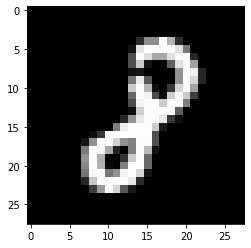

Iteration:  [2]
Label:  8


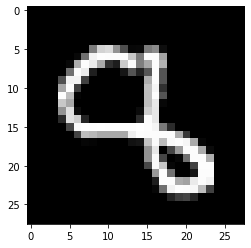

Iteration:  [5]
Label:  5


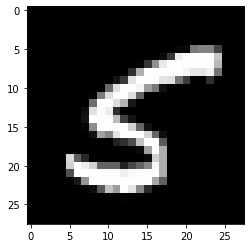

Iteration:  [5]
Label:  5


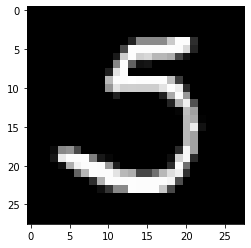

Iteration:  [1]
Label:  1


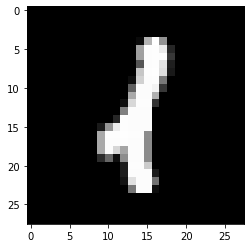

Iteration:  [9]
Label:  3


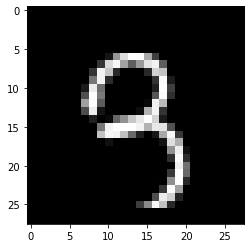

Iteration:  [2]
Label:  2


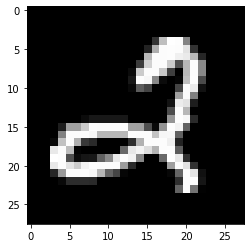

Iteration:  [7]
Label:  7


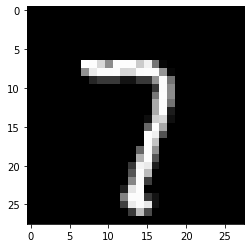

In [28]:
prediction_test(333, W1, b1, W2, b2)
prediction_test(1673, W1, b1, W2, b2)
prediction_test(865, W1, b1, W2, b2)
prediction_test(2761, W1, b1, W2, b2)
prediction_test(354, W1, b1, W2, b2)
prediction_test(2675, W1, b1, W2, b2)
prediction_test(1759, W1, b1, W2, b2)
prediction_test(201, W1, b1, W2, b2)